In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt5

In [2]:
import sys

In [3]:
sys.path.insert(0, "/home/pleroy/DEV/processing/PoSAR-MC")
from posarmctools.readdata import *

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
sys.path.insert(0, "/home/pleroy/DEV/processing/focalization_python")
from posarutils.other.read_data_and_build_rd import *
from posarutils.other.PosarMCParameters import *

In [6]:
data_date = "2018_06_27_12_39_39"
data_dir = "/home/pleroy/DATA/2018_06_27_LETG/2018_06_27/jde/" + data_date

In [7]:
params_filename = data_dir + "/" + data_date + "_parameters.xml"
params = PosarMCParameters_v2( params_filename )
params.print()

requestedTRamp 1200.0
configuredTRamp 1200.0
startFrequency 5725000000.0
stopFrequency 5875000000.0
frequencyBand 150000000.0
frequencyDevReq 50000.0
frequencyDevConf 50001.1
numberOfSteps 3000
waveformType 1
rampsPerBuffer 375
bufferSize 9000000.0
buffersPerFile 2
rampsPerFile 750
fileSize 18000000.0
samplingFrequency 10000000.0
samplesPerRamp 12000
skipNSamples 0


In [8]:
buffersPerFile = params.buffersPerFile
samplesPerRamp = params.samplesPerRamp
rampsPerFile = params.rampsPerFile
samplesPerFile = samplesPerRamp * rampsPerFile

print( "buffersPerFile = {}, samplesPerRamp = {}, rampsPerFile = {}".format(
    buffersPerFile, samplesPerRamp, rampsPerFile )
     )

# selection in record
firstFile = 0
nbFiles = 342
lastFile = firstFile + nbFiles - 1
firstBuffer = firstFile * buffersPerFile

buffersPerFile = 2, samplesPerRamp = 12000, rampsPerFile = 750


# Read the data

In [9]:
scalingFactor = 2 / 65535
offset = -32768

In [10]:
timeSerie_A = np.zeros( samplesPerFile )
adc_A = np.zeros( (nbFiles, samplesPerFile) )

In [11]:
lastBuffer = (nbFiles-1) * buffersPerFile + firstBuffer
for k in range( nbFiles ):
    
    # read the data
    nb = str( int( k * buffersPerFile + firstBuffer) )
    filename = data_dir + "/record" + nb + ".bin"
    readFileADLINKCh0( filename, samplesPerFile, timeSerie_A )
    
    print("k = {}, block = {} / {}".format(k, nb, lastBuffer))
    
    adc_A[ k, : ] = (timeSerie_A + offset) * scalingFactor

k = 0, block = 0 / 682
k = 1, block = 2 / 682
k = 2, block = 4 / 682
k = 3, block = 6 / 682
k = 4, block = 8 / 682
k = 5, block = 10 / 682
k = 6, block = 12 / 682
k = 7, block = 14 / 682
k = 8, block = 16 / 682
k = 9, block = 18 / 682
k = 10, block = 20 / 682
k = 11, block = 22 / 682
k = 12, block = 24 / 682
k = 13, block = 26 / 682
k = 14, block = 28 / 682
k = 15, block = 30 / 682
k = 16, block = 32 / 682
k = 17, block = 34 / 682
k = 18, block = 36 / 682
k = 19, block = 38 / 682
k = 20, block = 40 / 682
k = 21, block = 42 / 682
k = 22, block = 44 / 682
k = 23, block = 46 / 682
k = 24, block = 48 / 682
k = 25, block = 50 / 682
k = 26, block = 52 / 682
k = 27, block = 54 / 682
k = 28, block = 56 / 682
k = 29, block = 58 / 682
k = 30, block = 60 / 682
k = 31, block = 62 / 682
k = 32, block = 64 / 682
k = 33, block = 66 / 682
k = 34, block = 68 / 682
k = 35, block = 70 / 682
k = 36, block = 72 / 682
k = 37, block = 74 / 682
k = 38, block = 76 / 682
k = 39, block = 78 / 682
k = 40, block =

k = 310, block = 620 / 682
k = 311, block = 622 / 682
k = 312, block = 624 / 682
k = 313, block = 626 / 682
k = 314, block = 628 / 682
k = 315, block = 630 / 682
k = 316, block = 632 / 682
k = 317, block = 634 / 682
k = 318, block = 636 / 682
k = 319, block = 638 / 682
k = 320, block = 640 / 682
k = 321, block = 642 / 682
k = 322, block = 644 / 682
k = 323, block = 646 / 682
k = 324, block = 648 / 682
k = 325, block = 650 / 682
k = 326, block = 652 / 682
k = 327, block = 654 / 682
k = 328, block = 656 / 682
k = 329, block = 658 / 682
k = 330, block = 660 / 682
k = 331, block = 662 / 682
k = 332, block = 664 / 682
k = 333, block = 666 / 682
k = 334, block = 668 / 682
k = 335, block = 670 / 682
k = 336, block = 672 / 682
k = 337, block = 674 / 682
k = 338, block = 676 / 682
k = 339, block = 678 / 682
k = 340, block = 680 / 682
k = 341, block = 682 / 682


In [12]:
A_reshaped = adc_A.reshape(nbFiles * rampsPerFile, samplesPerRamp)

**Check that the first ramp is an up ramp**

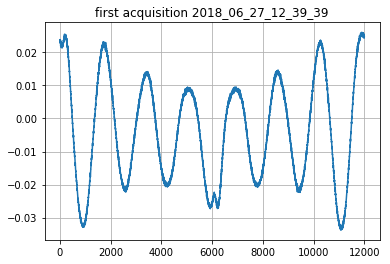

In [13]:
plt.figure()
plt.plot( A_reshaped[0, :] )
title = "first acquisition " + data_date
plt.title(title)
plt.grid()
plt.savefig( data_dir + "/" + title + ".png", bbox_inches='tight')

**Set the shifted flag properly**

In [14]:
rampDownFirst = 1

## Spectrum

### No window

In [ ]:
samplesPerDownRamp = int(samplesPerRamp/2)

In [ ]:
fft_A = np.fft.ifft(A_reshaped[:, 0:samplesPerDownRamp], axis=1)

In [ ]:
fft_abs = 20 * np.log10( np.abs( fft_A ) )

In [ ]:
plt.figure()
plt.imshow( fft_abs[::100, 0:1000] )
title = "no window " + data_date
plt.title(title)
plt.savefig( data_dir + "/" + title + ".png" )

### Hamming

In [ ]:
hamming = np.hamming(samplesPerDownRamp)

In [ ]:
fft_A_hamming = np.fft.ifft(A_reshaped[:, 0:samplesPerDownRamp]*hamming, axis=1)

In [ ]:
fft_abs_hamming = 20 * np.log10( np.abs( fft_A_hamming ) )

In [ ]:
plt.figure()
plt.imshow( fft_abs_hamming[::100, 0:1000], cmap='gray' )
title = "hamming " + data_date
plt.title(title)
plt.savefig( data_dir + "/" + title + ".png" )

### Hanning

In [ ]:
hanning = np.hanning(samplesPerDownRamp)

In [ ]:
fft_A_hanning = np.fft.ifft(A_reshaped[:, 0:samplesPerDownRamp]*hanning, axis=1)

In [ ]:
fft_abs_hanning = 20 * np.log10( np.abs( fft_A_hanning ) )

In [ ]:
plt.figure()
plt.imshow( fft_abs_hanning[::100, 0:1000], cmap='gray' )
title = "hanning " + data_date
plt.title(title)
plt.savefig( data_dir + "/" + title + ".png" )

### Blackman (peu utilisée, cf lff)

In [ ]:
blackman = np.blackman(samplesPerDownRamp)

In [ ]:
fft_A_blackman = np.fft.ifft(A_reshaped[:, 0:samplesPerDownRamp]*blackman, axis=1)

In [ ]:
fft_abs_blackman = 20 * np.log10( np.abs( fft_A_blackman ) )

In [ ]:
plt.figure()
plt.imshow( fft_abs_blackman[::100, 0:1000], cmap='gray' )
title = "blackman " + data_date
plt.title(title)
plt.savefig( data_dir + "/" + title + ".png" )

### Kaiser

In [ ]:
# beta Window shape
# 0    Rectangular
# 5    Similar to a Hamming
# 6    Similar to a Hanning
# 8.6  Similar to a Blackman
# kaiser = np.kaiser(samplesPerDownRamp)

In [ ]:
fft_A_kaiser = np.fft.ifft(A_reshaped[:, 0:samplesPerDownRamp]*kaiser, axis=1)

In [ ]:
fft_abs_kaiser = 20 * np.log10( np.abs( fft_A_kaiser ) )

In [ ]:
plt.figure()
plt.imshow( fft_abs_kaiser[::100, 0:1000], cmap='gray' )
plt.title("kaiser " + data_date)

# Build RD

In [16]:
#RDc = build_rd_from_data( params, A_reshaped, shifted )
withHanning = 1
RDc = build_rd_from_data_rampDown( params, A_reshaped, rampDownFirst, withHanning )

shape of the samples matrix = (256500, 12000)
with Hanning window
ramp down first in the data files


In [ ]:
coupling_RD = np.average(RDc, 0)
if withHanning:
    np.save( data_dir + "/coupling_RD_files_{}_{}_rampDown_hanning".format(firstFile, lastFile), coupling_RD )
else:
    np.save( data_dir + "/coupling_RD_files_{}_{}_rampDown".format(firstFile, lastFile), coupling_RD )

In [ ]:
plt.figure()
plt.plot(np.abs(coupling_RD), 'k', label='coupling')
plt.legend()
plt.grid()

In [ ]:
if withHanning:
    np.save(data_dir + '/RD_files_{}_{}_rampDown_hanning'.format(firstFile, lastFile), RDc) 
else:
    np.save(data_dir + '/RD_files_{}_{}_rampDown'.format(firstFile, lastFile), RDc)